In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import acf

In [2]:
df_raw = pd.read_csv('weatherAUS.csv', index_col='Date', parse_dates=True)

# Análisis exploratorio de los datos

In [3]:
df_raw.sample(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
26/03/2014,PearceRAAF,20.3,33.4,0.0,NaN,1.2,W,39.0,NE,W,...,33.0,31.0,1016.7,1015.8,8.0,5.0,25.8,28.7,No,No
24/08/2012,GoldCoast,18.9,25.7,0.0,NaN,NaN,NNW,41.0,NNW,N,...,82.0,59.0,1018.6,1014.6,NaN,NaN,20.9,25.4,No,No
12/05/2016,PerthAirport,6.9,26.2,0.0,4.0,9.7,NNE,33.0,NNE,W,...,47.0,40.0,1016.8,1014.3,0.0,1.0,16.3,23.2,No,No
05/03/2011,Launceston,2.5,19.3,0.6,NaN,NaN,SE,31.0,E,NNW,...,64.0,31.0,1027.9,1027.0,NaN,NaN,8.8,18.4,No,No
29/11/2009,GoldCoast,22.6,30.9,0.0,NaN,NaN,N,59.0,N,N,...,60.0,82.0,1005.3,1002.4,NaN,NaN,29.2,26.2,No,No
06/07/2014,Bendigo,3.7,12.4,0.8,NaN,NaN,W,30.0,W,W,...,99.0,73.0,1016.7,1015.3,8.0,8.0,4.7,11.5,No,No
06/02/2015,Portland,14.5,31.9,0.0,6.2,12.8,E,46.0,ENE,E,...,77.0,43.0,1023.2,1019.5,NaN,NaN,17.3,30.8,No,No
14/06/2013,Albany,7.6,18.1,0.0,0.8,8.4,NaN,NaN,NNE,E,...,63.0,58.0,1019.8,1017.5,3.0,1.0,12.0,16.7,No,No
19/03/2013,Portland,4.7,21.2,0.2,2.4,11.0,ESE,33.0,NNE,E,...,99.0,55.0,1024.5,1022.0,NaN,NaN,11.0,20.7,No,No


In [4]:
df_raw['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Adelaide            3193
Darwin              3193
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Albury              3040
MountGinini         3040
GoldCoast           3040
Wollongong          3040
MountGambier        3040
Launceston          3040
AliceSprings        3040
Albany              3040
Townsville          3040
Bendigo             3040
Cairns              3040
Ballarat            3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
PerthAirport        3009
Williamtown         3009
Cobar               3009
BadgerysCreek       3009
SydneyAirport       3009
Richmond            3009
Moree               3009
CoffsHarbour        3009
NorfolkIsland       3009
WaggaWagga          3009
Witchcliffe         3009
Watsonia            3009
Dartmoor            3009
Portland            3009
Sale                3009
MelbourneAirport    3009
Mildura         

Tomar solo los registros de la ciudad de Camberra y solo la columna de la temperatura máxima

In [5]:
df = df_raw[df_raw['Location'] == 'Canberra'][['MaxTemp']]

In [6]:
df = df.ffill()

In [7]:
df.sample(15)

,MaxTemp
Date,
09/02/2012,23.2
13/04/2014,20.1
20/04/2014,16.2
04/05/2011,19.1
30/05/2013,18.2
30/12/2009,28.5
18/03/2017,23.5
10/01/2015,27.6
30/01/2015,20.8


<Axes: title={'center': 'Daily max temperatures'}, xlabel='Date'>

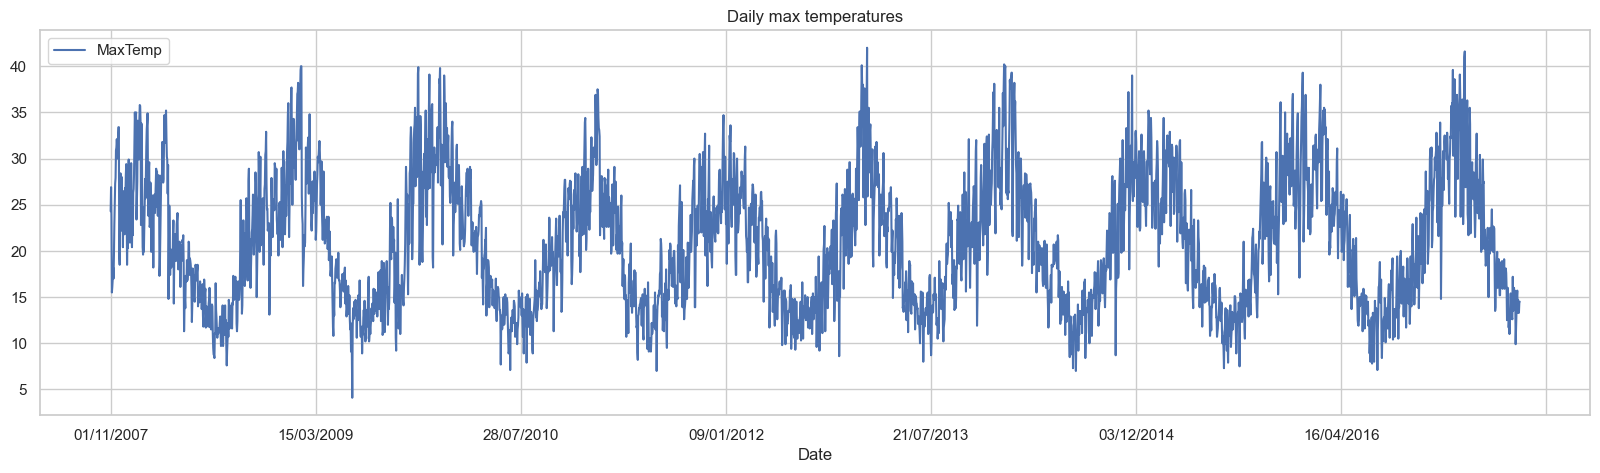

In [8]:
df.plot(title='Daily max temperatures', figsize=(20, 5))

# Descomposición de Hodrick-Prescott

[Text(0, 0.5, 'Daily max temperature')]

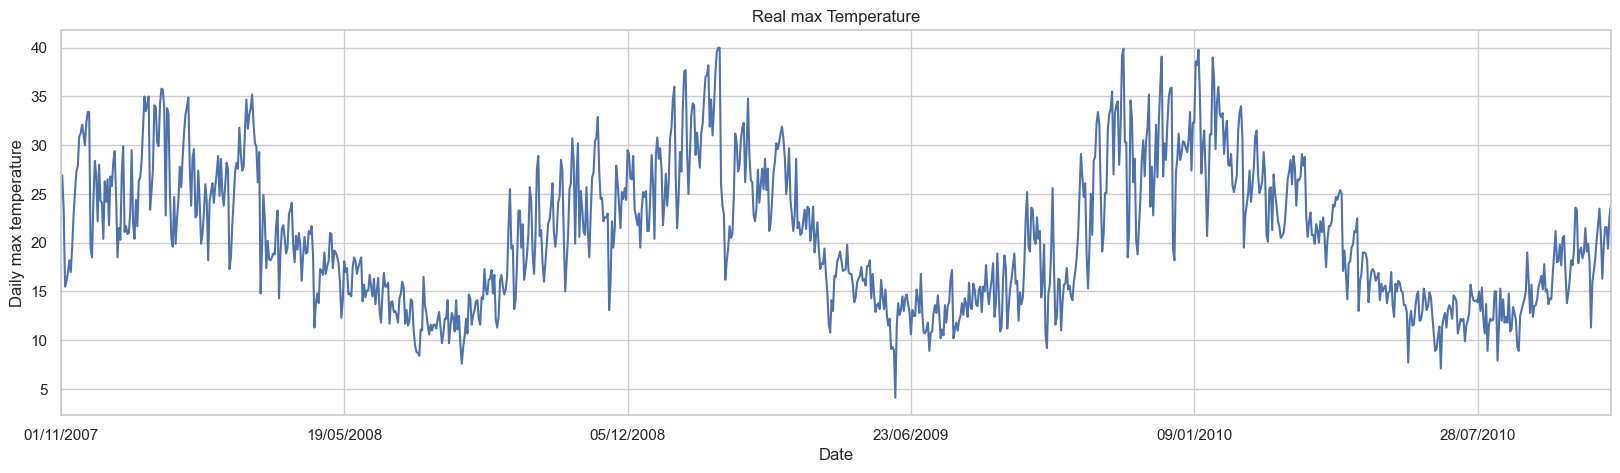

In [9]:
ax = df['MaxTemp'].iloc[:1095].plot(title='Real max Temperature', figsize=(20, 5))
ax.autoscale(axis='x', tight=True)
ax.set(ylabel='Daily max temperature')

In [10]:
cycle_100, trend_100 = hpfilter(df['MaxTemp'], lamb=100)
cycle_1600, trend_1600 = hpfilter(df['MaxTemp'], lamb=1600)
cycle_14400, trend_14400 = hpfilter(df['MaxTemp'], lamb=14400)

In [11]:
df = df.assign(
    cycle_100=cycle_100,
    trend_100=trend_100,
    cycle_1600=cycle_1600,
    trend_1600=trend_1600,
    cycle_14400=cycle_14400,
    trend_14400=trend_14400
)

Gráfica de la tendencia, con diferentes valores para lamb (100, 1600, 14400)

<Axes: title={'center': 'Daily max temp. vs Trend Hodrick-Prescott'}, xlabel='Date'>

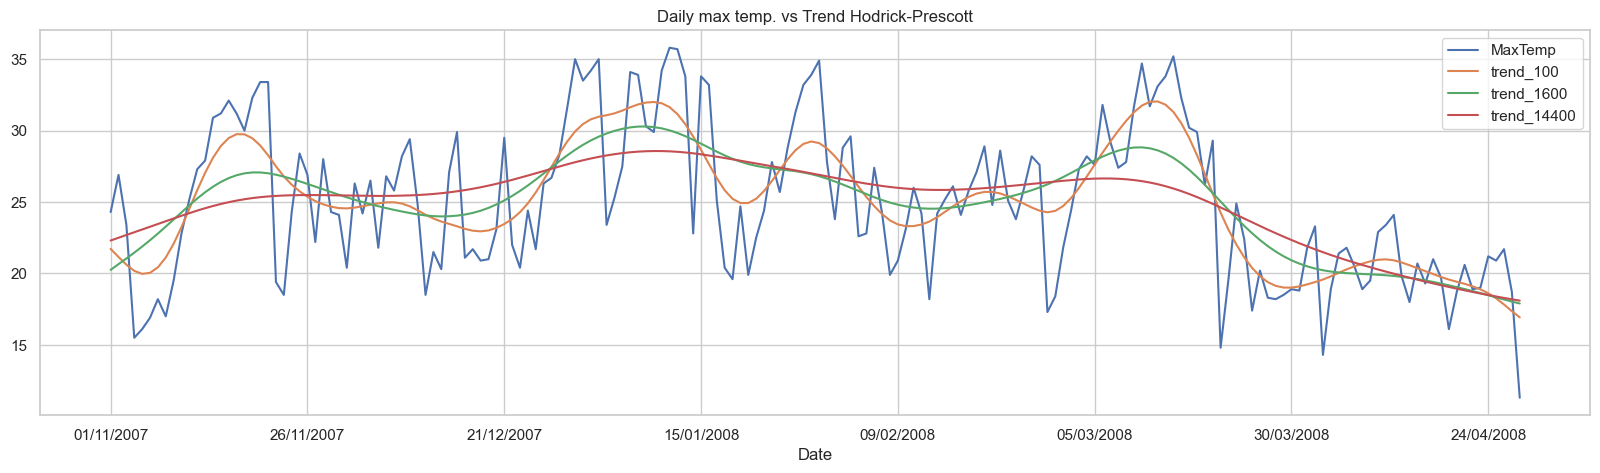

In [12]:
df[['MaxTemp', 'trend_100', 'trend_1600', 'trend_14400']].iloc[:180].plot(title='Daily max temp. vs Trend Hodrick-Prescott', figsize=(20, 5))

Cycle

<Axes: title={'center': 'Daily max temp. vs Cycle'}, xlabel='Date'>

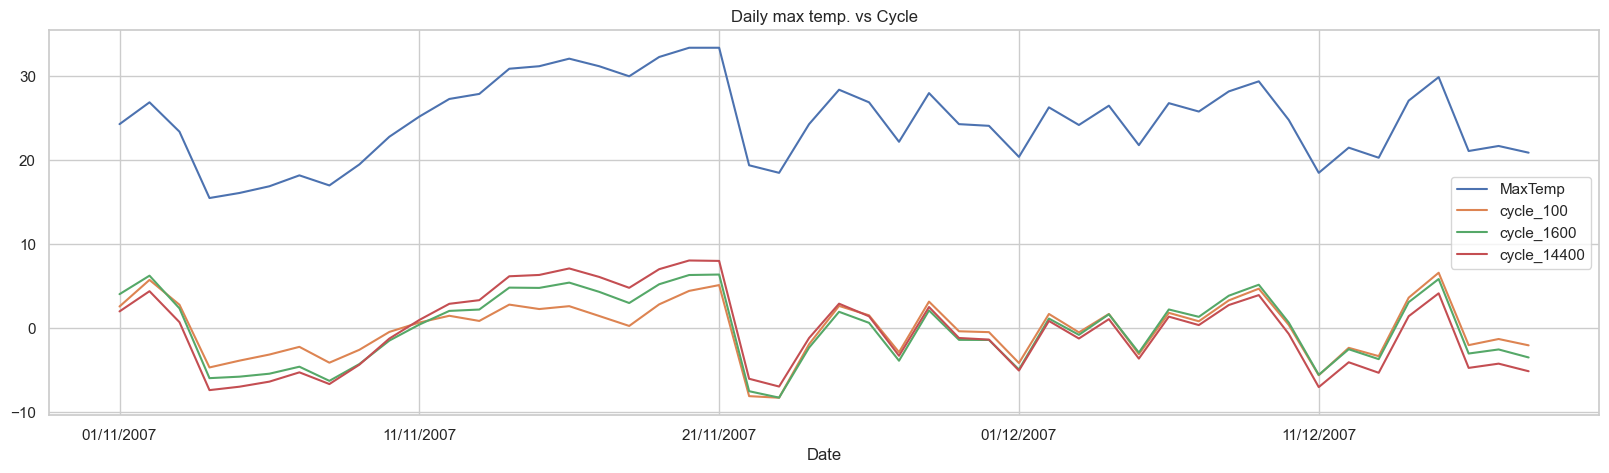

In [13]:
df[['MaxTemp', 'cycle_100', 'cycle_1600', 'cycle_14400']].iloc[:48].plot(title='Daily max temp. vs Cycle', figsize=(20, 5))

# Descomposición ETS (Error-Trend-Seasonality)

In [14]:
df = df.ffill()

In [15]:
if not isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index, format='%d/%m/%Y', dayfirst=True)

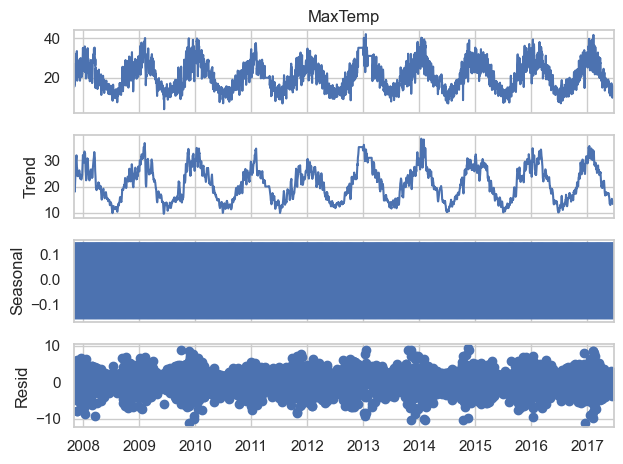

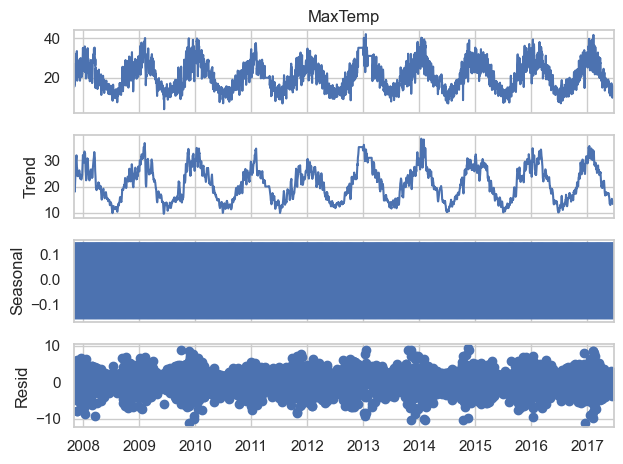

In [16]:
df = df.resample('D').ffill()
result = seasonal_decompose(df['MaxTemp'], model='additive')
result.plot()

# SMA (Simple Moving Average)

In [17]:
df['12-month-SMA'] = df['MaxTemp'].rolling(window = 12).mean().shift(-1)

<Axes: xlabel='Date'>

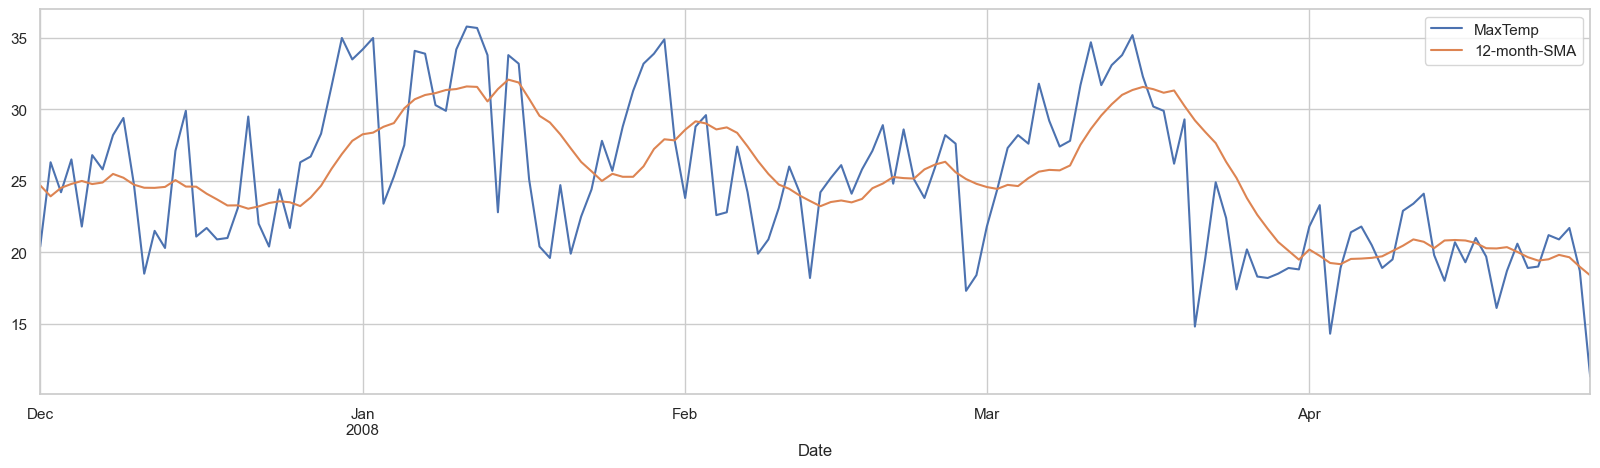

In [18]:
df[['MaxTemp', '12-month-SMA']].iloc[30:180].plot(figsize=(20, 5))

# SES (Simple Exponential Smooting)

In [19]:
span = 12
alpha = 2/(span+1)

In [20]:
df['SES12'] = SimpleExpSmoothing(df['MaxTemp']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)

<Axes: title={'center': 'Daily max temperature vs SES12'}, xlabel='Date'>

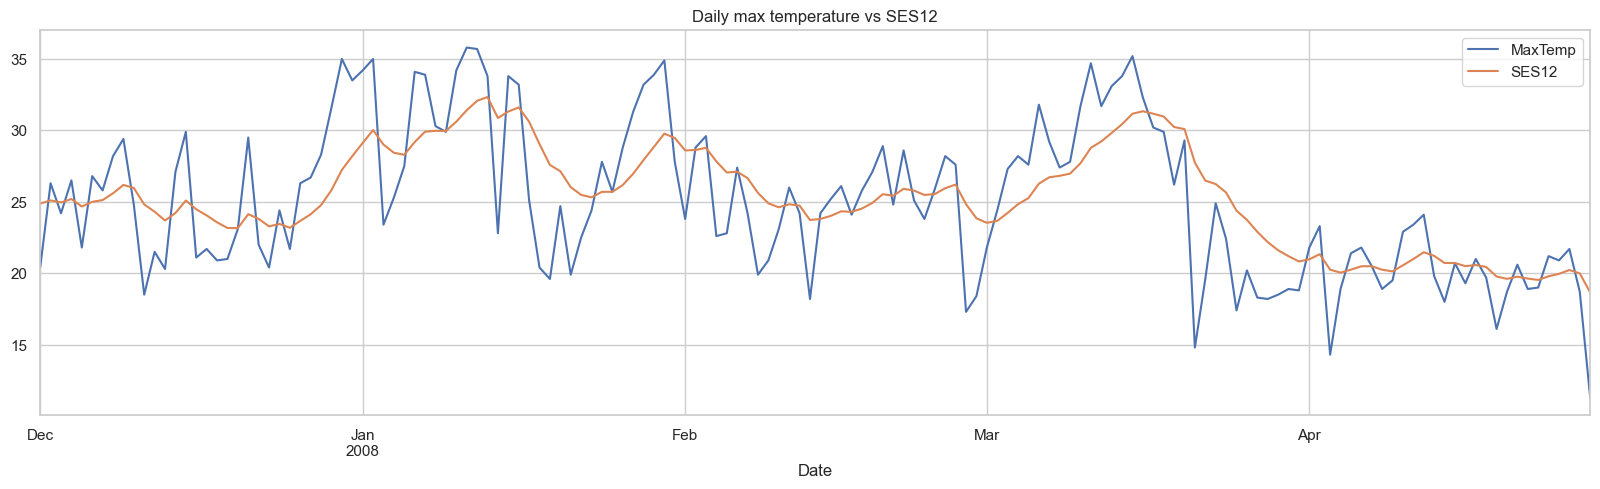

In [21]:
df[['MaxTemp', 'SES12']].iloc[30:180].plot(title='Daily max temperature vs SES12', figsize=(20, 5))

# DES (Double Exponential Smoothing)

In [22]:
df['DESadd'] = ExponentialSmoothing(df['MaxTemp'],trend='add').fit().fittedvalues.shift(-1)
df['DESmul'] = ExponentialSmoothing(df['MaxTemp'],trend='mul').fit().fittedvalues.shift(-1)

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Daily max temperature. DESadd vs DESmul'}, xlabel='Date'>

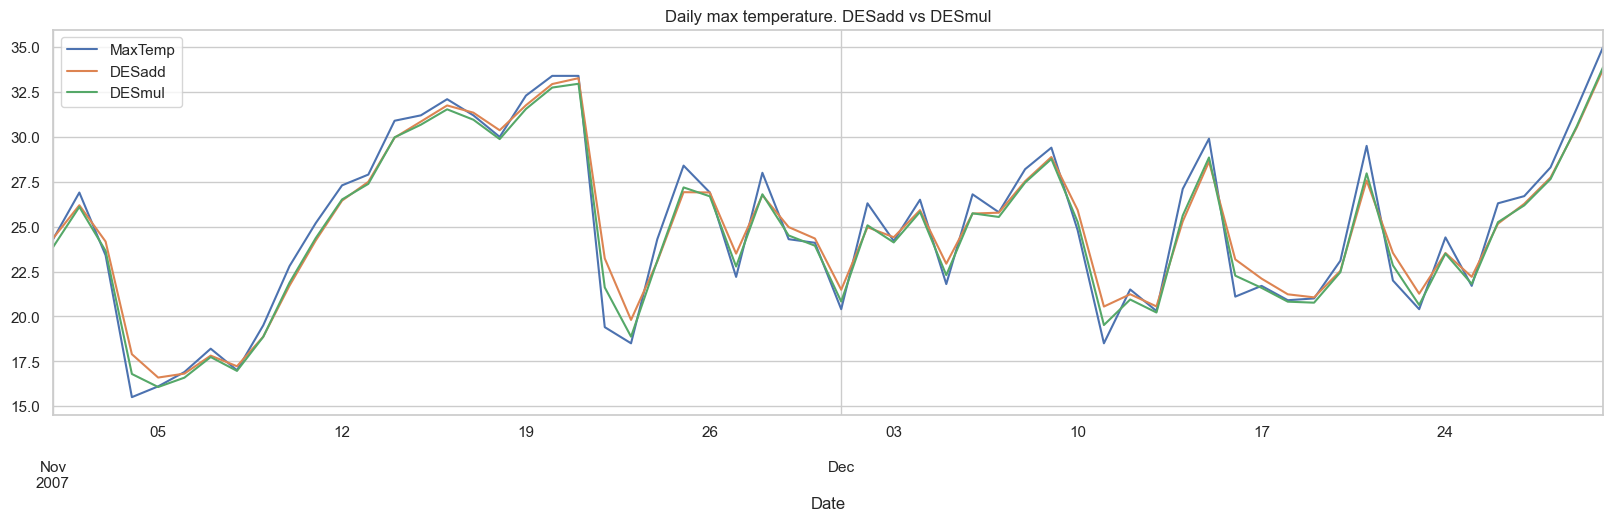

In [23]:
df[['MaxTemp', 'DESadd', 'DESmul']].iloc[:60].plot(title='Daily max temperature. DESadd vs DESmul', figsize=(20,5))

# TES (Triple Exponential Smoothing)

### Additive

<Axes: title={'center': 'Daily max temperature vs TESadd12'}, xlabel='Date'>

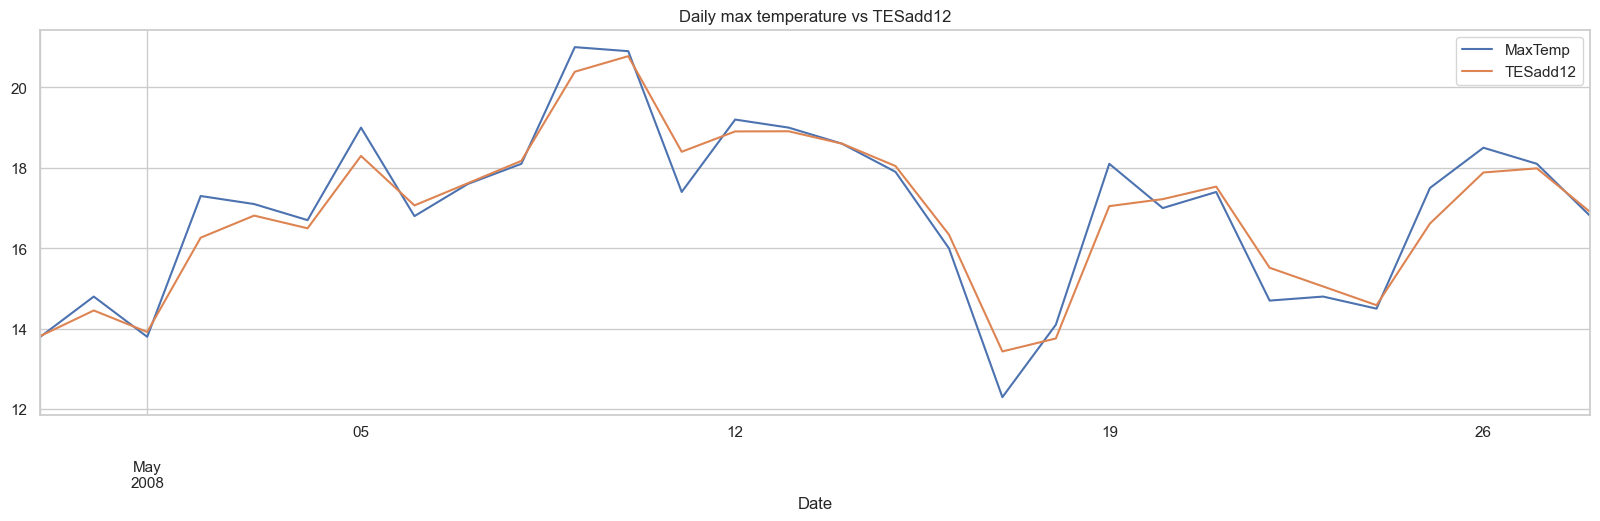

In [24]:
df['TESadd12'] = ExponentialSmoothing(df['MaxTemp'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues.shift(-1)
df[['MaxTemp', 'TESadd12']].iloc[180:210].plot(title='Daily max temperature vs TESadd12', figsize=(20,5))

### Multiplicative

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Daily max temperature vs TESmul12'}, xlabel='Date'>

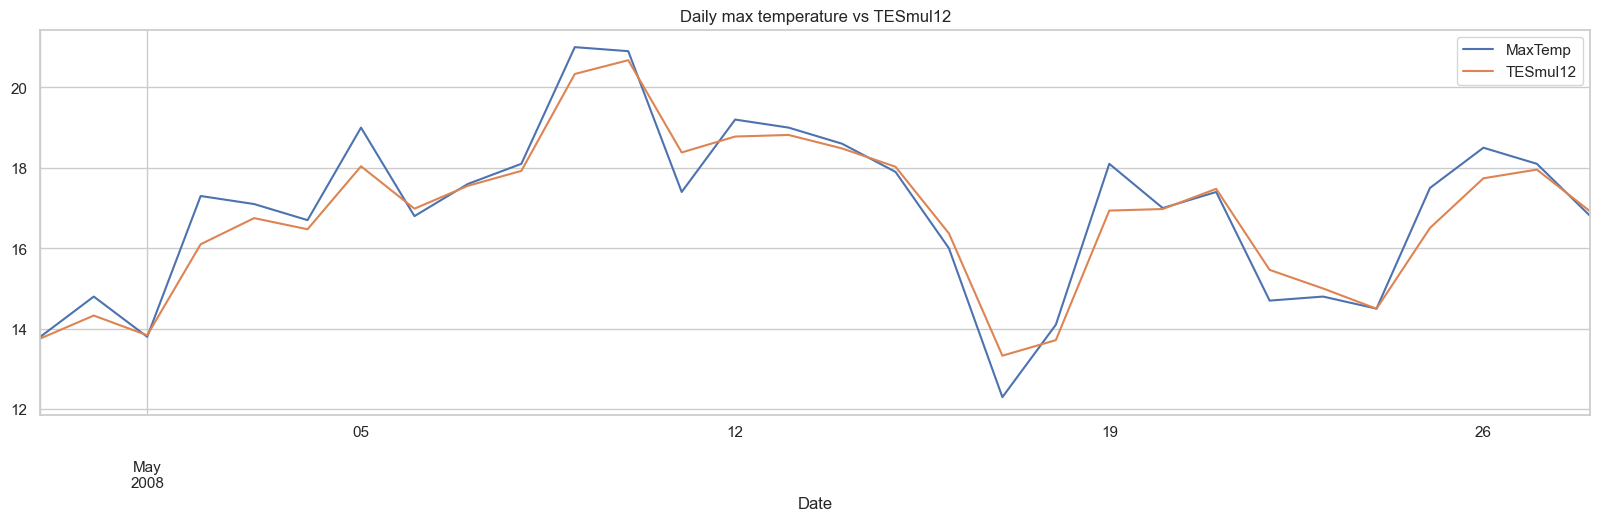

In [25]:
df['TESmul12'] = ExponentialSmoothing(df['MaxTemp'],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
df[['MaxTemp', 'TESmul12']].iloc[180:210].plot(title='Daily max temperature vs TESmul12', figsize=(20,5))

Comparativa

<Axes: title={'center': 'Daily max temperature. TESadd12 vs TESmul12'}, xlabel='Date'>

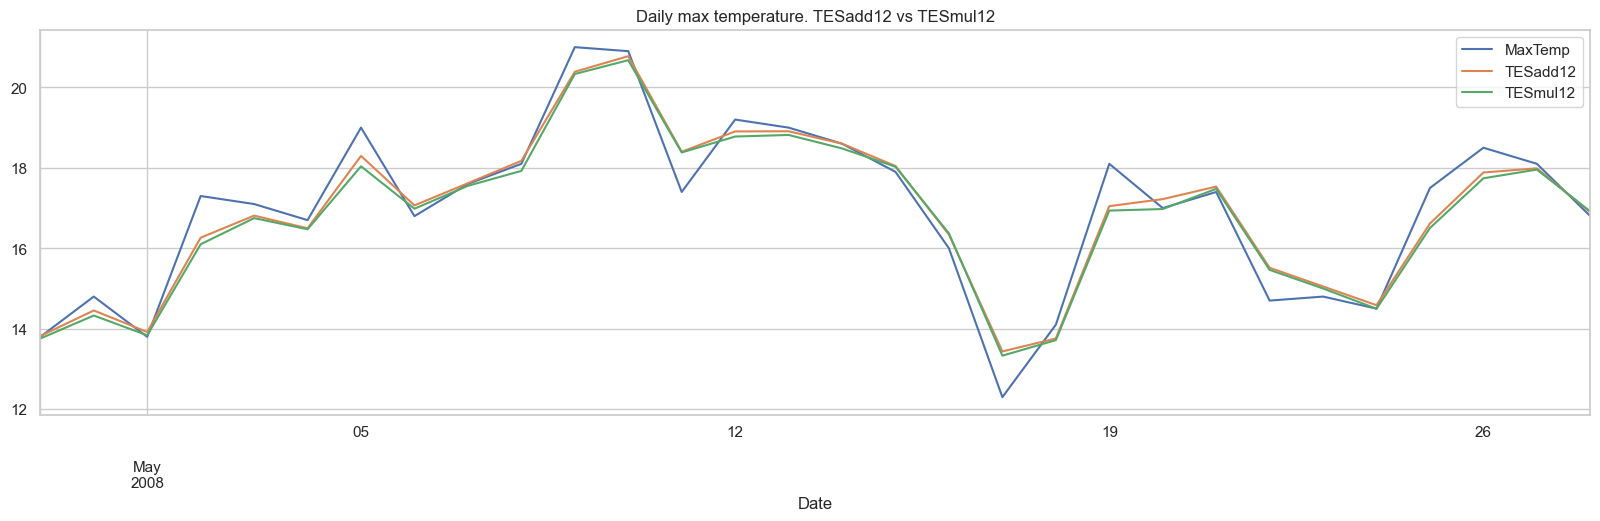

In [26]:
df[['MaxTemp', 'TESadd12', 'TESmul12']].iloc[180:210].plot(title='Daily max temperature. TESadd12 vs TESmul12', figsize=(20, 5))

# Pronósticos (Forecasting)

In [27]:
len(df['MaxTemp'])

3525

In [28]:
train_data_len = len(df['MaxTemp']) * 0.8
test_data_len = len(df['MaxTemp']) - train_data_len
df_test = df.iloc[int(train_data_len):]

In [29]:
df_train_data = df.iloc[:int(train_data_len)]
df_test_data = df.iloc[int(train_data_len):]

In [30]:
df_add_fitted_model = ExponentialSmoothing(df_train_data['MaxTemp'], trend='add', seasonal='add', seasonal_periods=12).fit()
df_mul_fitted_model = ExponentialSmoothing(df_train_data['MaxTemp'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

c:\Sevann\UBA\UBA-AST\venv\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [31]:
df_add_test_predictions = df_add_fitted_model.forecast(int(test_data_len)).rename('HW Forecast')
df_mul_test_predictions = df_mul_fitted_model.forecast(int(test_data_len)).rename('HW Forecast')

In [32]:
df_add_test_predictions.sample(15)

2016-10-04    11.754787
2017-03-19    10.768622
2016-08-07    12.380964
2016-06-01    12.676680
2015-09-18    13.614634
2015-07-30    13.399681
2016-02-22    13.187295
2016-03-02    12.577234
2015-09-29    13.425172
2015-11-21    13.586200
2017-05-03    11.397318
2016-11-02    12.307341
2015-10-01    13.735594
2017-04-12    10.677239
2015-09-12    13.598509
Name: HW Forecast, dtype: float64

In [33]:
df.sample(15)

,MaxTemp,cycle_100,trend_100,cycle_1600,trend_1600,cycle_14400,trend_14400,12-month-SMA,SES12,DESadd,DESmul,TESadd12,TESmul12
Date,,,,,,,,,,,,,
2014-05-02,13.9,-1.829885,15.729885,-3.035418,16.935418,-3.893843,17.793843,17.933333,17.840314,14.605751,14.199647,14.878769,14.958139
2013-09-24,23.3,3.456616,19.843384,3.878978,19.421022,3.229341,20.070659,18.283333,18.900355,22.900956,22.967605,22.817598,22.944545
2017-02-12,31.9,-0.318463,32.218463,0.590482,31.309518,0.756643,31.143357,32.508333,33.926358,34.364221,33.379437,34.229918,34.679711
2012-12-27,35.1,2.536385,32.563615,3.766825,31.333175,4.830512,30.269488,35.100000,35.033522,35.095605,34.813776,35.190332,35.799840
2008-08-29,16.2,1.065820,15.134180,1.538520,14.661480,1.494746,14.705254,14.433333,14.331610,15.839295,15.775064,15.760559,15.760716
2011-09-28,15.1,-1.197987,16.297987,-2.502559,17.602559,-3.407774,18.507774,19.208333,18.513510,16.213122,15.738509,16.322624,16.558126
2012-07-26,15.0,1.684310,13.315690,1.685253,13.314747,1.892149,13.107851,13.691667,13.814678,14.732265,14.718088,14.682716,14.771020
2015-10-11,22.1,-3.478496,25.578496,-2.968319,25.068319,-1.505894,23.605894,25.541667,24.115249,23.399689,22.845150,23.664810,23.903262
2015-09-04,16.7,1.414398,15.285602,0.973991,15.726009,0.693825,16.006175,14.783333,14.896922,15.892453,16.027211,16.005537,16.098242


<Axes: xlabel='Date'>

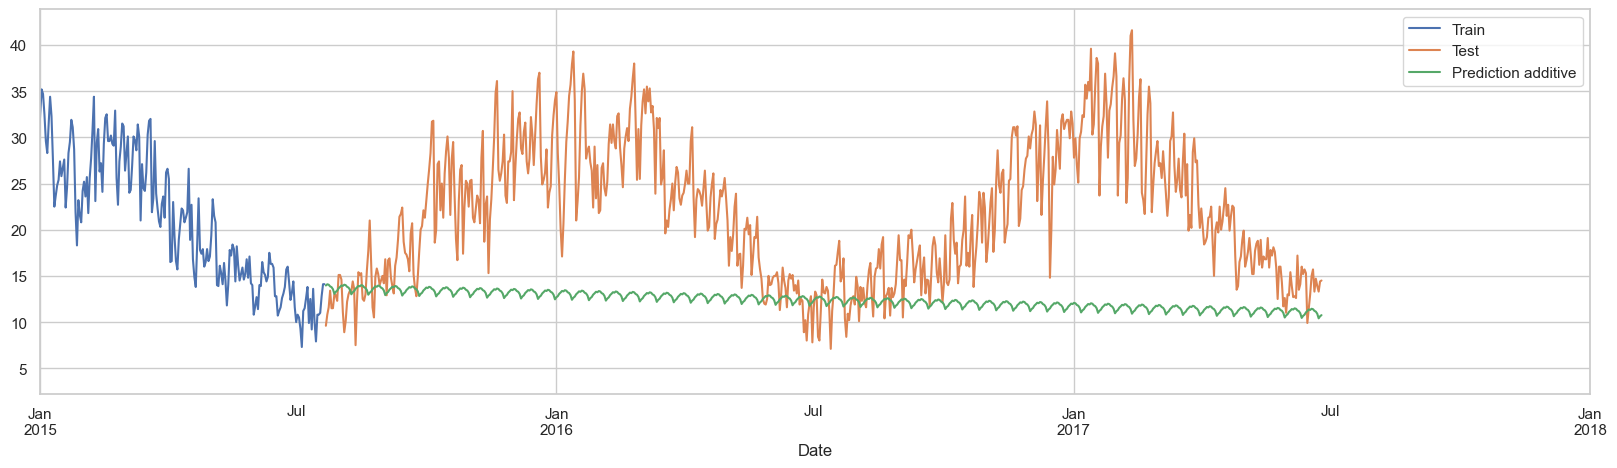

In [34]:
df_train_data['MaxTemp'].plot(legend = True, label = 'Train')
df_test_data['MaxTemp'].plot(legend = True, label = 'Test')
df_add_test_predictions.plot(legend = True, label = 'Prediction additive', figsize=(20,5), xlim=['2015-01-01','2018-01-01'])

<Axes: xlabel='Date'>

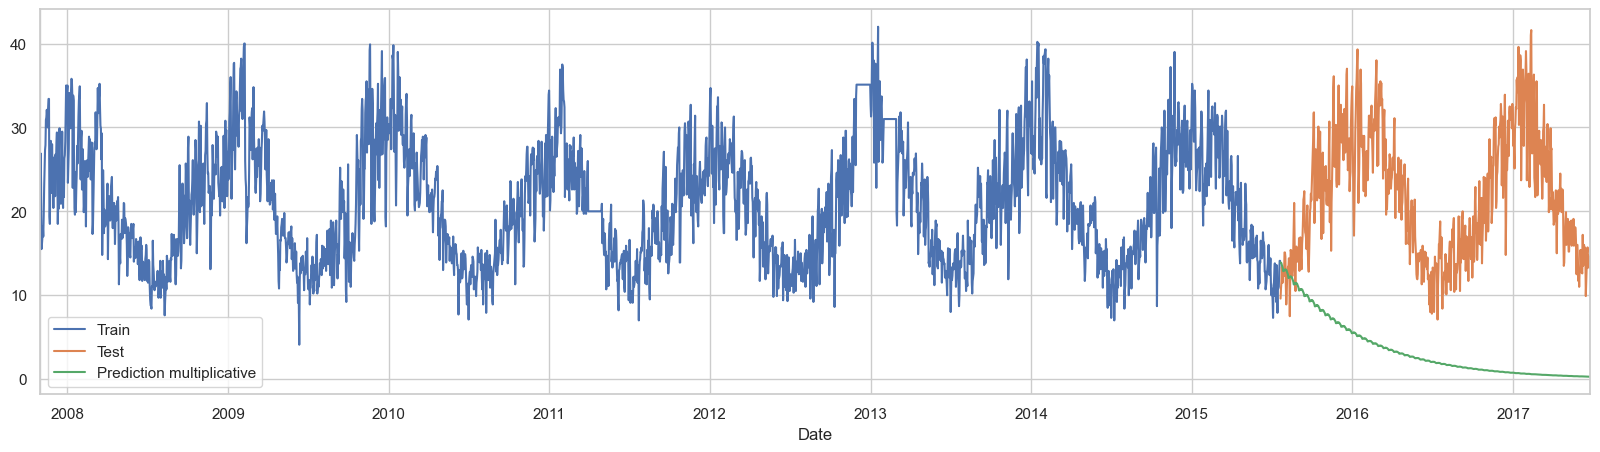

In [35]:
df_train_data['MaxTemp'].plot(legend = True, label = 'Train')
df_test_data['MaxTemp'].plot(legend = True, label = 'Test')
df_mul_test_predictions.plot(legend = True, label = 'Prediction multiplicative', figsize=(20,5))

# Métricas de evaluación

Additive

In [36]:
mean_absolute_error(df_test_data['MaxTemp'], df_add_test_predictions)

np.float64(9.746309338597984)

In [37]:
mean_squared_error(df_test_data['MaxTemp'], df_add_test_predictions)

np.float64(144.09669208663342)

Multiplicative

In [38]:
mean_absolute_error(df_test_data['MaxTemp'], df_mul_test_predictions)

np.float64(18.41439455939061)

In [39]:
mean_squared_error(df_test_data['MaxTemp'], df_mul_test_predictions)

np.float64(406.8487713706754)

# Estacionaridad

In [40]:
sts.adfuller(df['MaxTemp'])

(np.float64(-3.517790964604335),
 np.float64(0.007541768793426983),
 17,
 3507,
 {'1%': np.float64(-3.4322160088068467),
  '5%': np.float64(-2.8623644968791626),
  '10%': np.float64(-2.567208893917733)},
 np.float64(17588.401268622227))

# Funciones de autocorrelación y autocorrelación parcial

In [41]:
# Compute the autocorrelation values
acf_values = acf(df['MaxTemp'], nlags=40)

print(acf_values)

[1.         0.89214722 0.81030664 0.77511969 0.76246236 0.76032388
 0.75512411 0.74367974 0.73372676 0.73279586 0.73534939 0.73440383
 0.73089034 0.73009101 0.7204146  0.71450041 0.71030118 0.70619368
 0.70543354 0.69946678 0.69132584 0.68418027 0.67936854 0.67716731
 0.67798813 0.66987579 0.66048866 0.64883322 0.63756262 0.63321995
 0.62777252 0.62699697 0.61700879 0.60421916 0.59433474 0.5860814
 0.5740631  0.56713561 0.5591227  0.55153814 0.54918468]


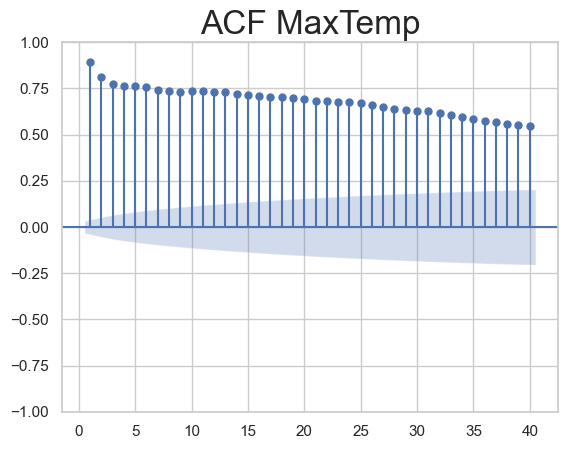

In [42]:
sgt.plot_acf(df['MaxTemp'], lags = 40, zero = False)
plt.title("ACF MaxTemp", size = 24)
plt.show()

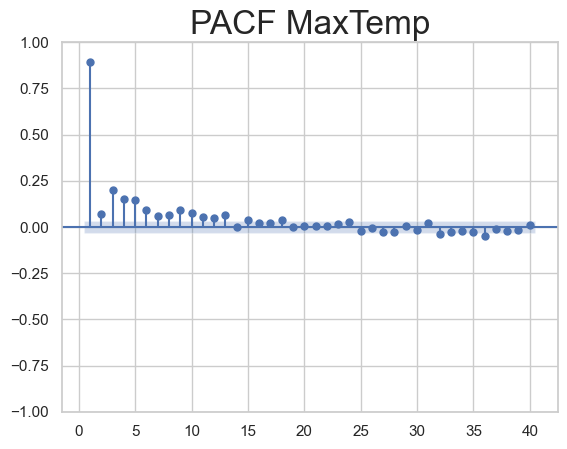

In [43]:
sgt.plot_pacf(df['MaxTemp'], lags = 40, zero = False, method = ('ols'))
plt.title("PACF MaxTemp", size = 24)
plt.show()